<a href="https://colab.research.google.com/github/BerkayBilici/berkaybilici/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA

In this document, we will analyze the clean_steam dataset through the following aspects:

* The overall relationship between game price and rating

*  The rating differences between paid and free games

*  The rating comparison between singleplayer and multiplayer games

*  The rating trends across different time periods, including the COVID-19 pandemic


In [4]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

# The libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# we are using the cleaned data
df = pd.read_csv("/content/drive/MyDrive/dsa210/clean_steam.csv")
print(df.head())


Mounted at /content/drive
     AppID                                    Name  Release date  Price  \
0   402890                             Nyctophilia  Sep 23, 2015   0.00   
1  1151740                         Prison Princess   Apr 2, 2020  19.99   
2   431510  Mystic Destinies: Serendipity of Aeons  Feb 11, 2016   0.00   
3  1154840                           Shadow Empire   Dec 3, 2020  39.99   
4   282010                    Carmageddon Max Pack  Jun 30, 1997   9.99   

   Positive  Negative                                         Categories  \
0       196       106                                      Single-player   
1       264        46  Single-player,Steam Achievements,Full controll...   
2       318        72  Single-player,Steam Achievements,Steam Trading...   
3      1145       168  Single-player,Multi-player,PvP,Shared/Split Sc...   
4       769       101  Single-player,Multi-player,Steam Trading Cards...   

                              Genres  \
0       Adventure,Free To 

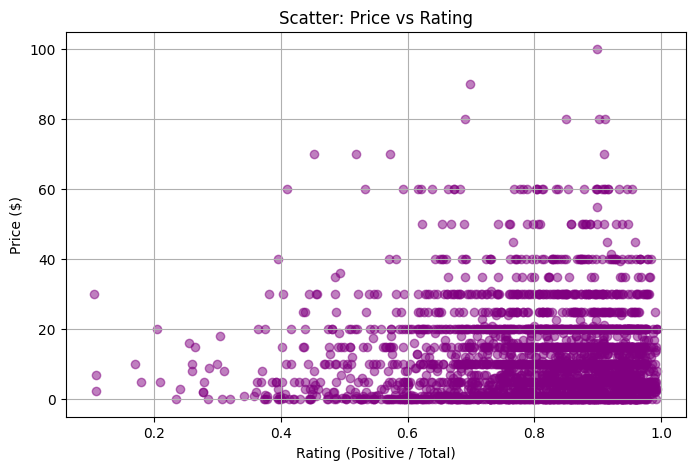

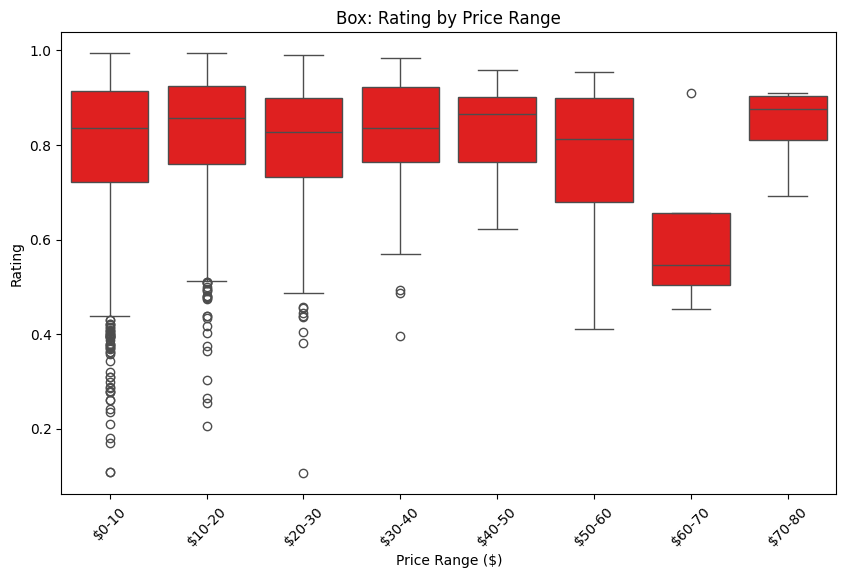

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Rating"], df["Price"], alpha=0.5, color='purple')
plt.title("Scatter: Price vs Rating")
plt.xlabel("Rating (Positive / Total)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

bins = list(range(0, 90, 10))
labels = [f"${i}-{i+10}" for i in bins[:-1]] # ı used some help from chatgpt here, couldn't do by myself
df["Price Range"] = pd.cut(df["Price"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Price Range", y="Rating", data=df, color='red')
plt.title("Box: Rating by Price Range")
plt.xlabel("Price Range ($)")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()




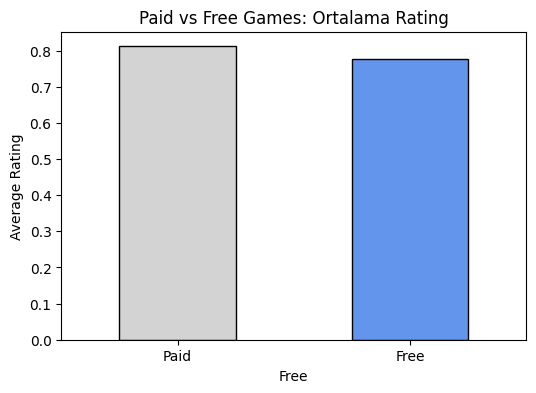

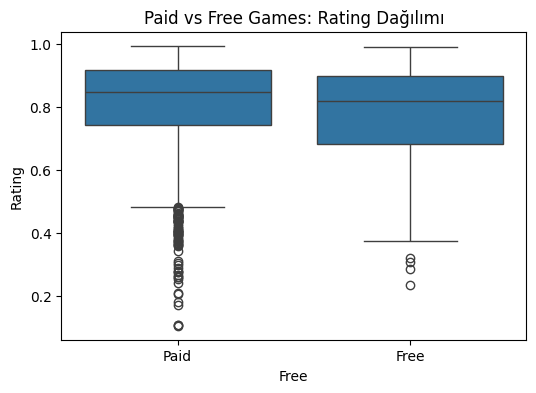

In [6]:
# creating free categorie
df["Free"] = df["Price"] == 0

# ────────── Bar Chart ──────────
mean_rating = df.groupby("Free")["Rating"].mean()
plt.figure(figsize=(6,4))
mean_rating.plot(kind="bar", color=["lightgray","cornflowerblue"], edgecolor="black")
plt.xticks([0,1], ["Paid","Free"], rotation=0)
plt.ylabel("Average Rating")
plt.title("Paid vs Free Games: Ortalama Rating")
plt.show()

# ────────── Box Plot ──────────
plt.figure(figsize=(6,4))
sns.boxplot(x="Free", y="Rating", data=df,)
plt.xticks([0,1], ["Paid","Free"])
plt.ylabel("Rating")
plt.title("Paid vs Free Games: Rating Dağılımı")
plt.show()


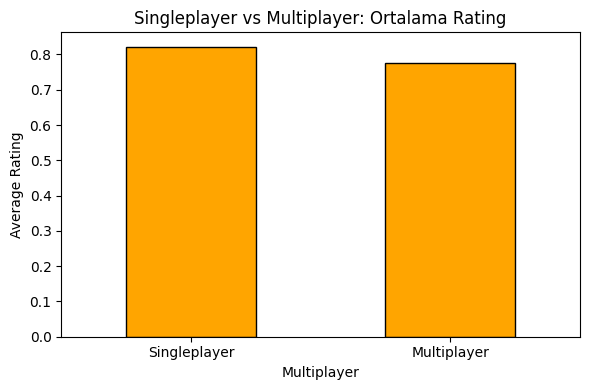

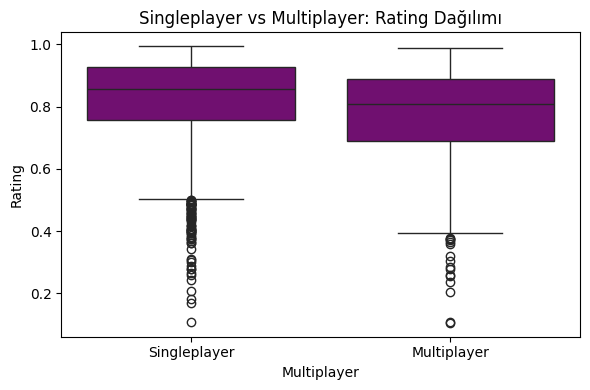

In [22]:

# creating the multiplayer categorie(used some help from chatgpt)
df["Multiplayer"] = df["Categories"].str.contains("Multi-player")

# Bar Chart
mean_rating = df.groupby("Multiplayer")["Rating"].mean()
plt.figure(figsize=(6, 4))
mean_rating.plot(
    kind="bar",
    color=["orange"],
    edgecolor="black"
)
plt.xticks([0,1], ["Singleplayer", "Multiplayer"], rotation=0)
plt.ylabel("Average Rating")
plt.title("Singleplayer vs Multiplayer: Ortalama Rating")
plt.tight_layout()
plt.show()

#Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="Multiplayer", y="Rating", data=df, color= 'purple'
)
plt.xticks([0,1], ["Singleplayer", "Multiplayer"])
plt.ylabel("Rating")
plt.title("Singleplayer vs Multiplayer: Rating Dağılımı")
plt.tight_layout()
plt.show()


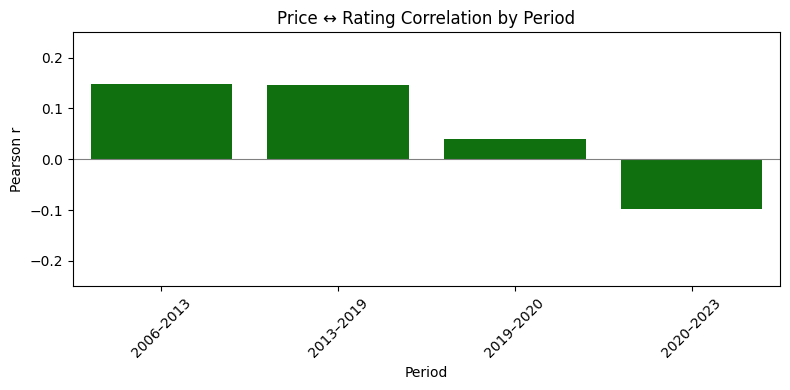

In [30]:

# 1) I used lot's of help from AI while calculating this graph.
df['Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

# 2) I spesificly analyzed the corona period to see if the relation changed or not.
bins   = [2006, 2013, 2019, 2020, 2023]
labels = ['2006–2013', '2013–2019', '2019–2020', '2020–2023']
df['Period'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

# 3) I used pearson because i need to see the periods. if ı used rating-price, I needed to create 4 dsitinct graphs and it would look bad.
records = []# I used some here from AI aswell.
for period in labels:
    sub = df[df['Period']==period].dropna(subset=['Price','Rating'])
    if len(sub) >= 2:
        r, _ = pearsonr(sub['Price'], sub['Rating'])
    else:
        r = float('nan')
    records.append({'Period': period, 'Pearson_r': r})

corrs = pd.DataFrame(records)

# 4) Bar chart
plt.figure(figsize=(8,4))
sns.barplot(data=corrs, x='Period', y='Pearson_r', color='green')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Price ↔ Rating Correlation by Period')
plt.xlabel('Period')
plt.ylabel('Pearson r')
plt.ylim(-0.25,0.25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## important note

I used some help from chatgpt in this homework. I spesificly put some notes which showes where I used help.